In [1]:
# install modules/packages

import sys
# !{sys.executable} -m pip install -U pandas-profiling
# !pip install widgetsnbextension
# !jupyter nbextension enable --py widgetsnbextension
# !pip install matplotlib
# !pip install graphviz

In [2]:
import pandas as pd
from scipy.io import arff
import numpy as np

data_file="../data/german_credit.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
# data_file="bank.arff"
# data_file="churn.arff"
data=arff.loadarff(data_file)
# print(data[0])
df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    # making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
# Look at loaded data and data types
df.head(10)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18.0,4,2,1049.0,1,2,4.0,2,...,4,2,21.0,3,1,1.0,3,1.0,1,1
1,1,1,9.0,4,0,2799.0,1,3,2.0,3,...,2,1,36.0,3,1,2.0,3,2.0,1,1
2,1,2,12.0,2,9,841.0,2,4,2.0,2,...,4,1,23.0,3,1,1.0,2,1.0,1,1
3,1,1,12.0,4,0,2122.0,1,3,3.0,3,...,2,1,39.0,3,1,2.0,2,2.0,1,2
4,1,1,12.0,4,0,2171.0,1,3,4.0,3,...,4,2,38.0,1,2,2.0,2,1.0,1,2
5,1,1,10.0,4,0,2241.0,1,2,1.0,3,...,3,1,48.0,3,1,2.0,2,2.0,1,2
6,1,1,8.0,4,0,3398.0,1,4,1.0,3,...,4,1,39.0,3,2,2.0,2,1.0,1,2
7,1,1,6.0,4,0,1361.0,1,2,2.0,3,...,4,1,40.0,3,2,1.0,2,2.0,1,2
8,1,4,18.0,4,3,1098.0,1,1,4.0,2,...,4,3,65.0,3,2,2.0,1,1.0,1,1
9,1,2,24.0,2,3,3758.0,3,1,1.0,2,...,4,4,23.0,3,1,1.0,1,1.0,1,1


In [3]:
# number of rows and number of columns for the dataset

nrow,nol=df.shape
nrow,nol

(1000, 21)

In [4]:
# dtypes: float64(6), object(15)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

In [5]:
# find any missing values
# isnull() will check all rows from each column and return "TRUE" if the value is missing, vice versa.
# any() if there is one cell's value is NULL, the result will be "TRUE"
# https://note.nkmk.me/en/python-pandas-nan-judge-count/

df.isnull().any()

# index of class atrribute is 0 (Creditability) for "German credit card" dataset

Creditability                        False
Account Balance                      False
Duration of Credit (month)           False
Payment Status of Previous Credit    False
Purpose                              False
Credit Amount                        False
Value Savings/Stocks                 False
Length of current employment         False
Instalment per cent                  False
Sex & Marital Status                 False
Guarantors                           False
Duration in Current address          False
Most valuable available asset        False
Age (years)                          False
Concurrent Credits                   False
Type of apartment                    False
No of Credits at this Bank           False
Occupation                           False
No of dependents                     False
Telephone                            False
Foreign Worker                       False
dtype: bool

In [6]:
# Find max, min, mean and standard deviation of 6 numeric attributes.

df.describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Age (years),No of Credits at this Bank,No of dependents
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,20.903000,3271.24800,2.973000,35.54200,1.407000,1.155000
std,12.058814,2822.75176,1.118715,11.35267,0.577654,0.362086
min,4.000000,250.00000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1365.50000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2319.50000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3972.25000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,75.00000,4.000000,2.000000


In [7]:
# Determine any outlier values (records) for each numeric attribute

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

num_attr=df.select_dtypes(include="float64")
result=[]
for i in num_attr:
   print(i)
   outliers = find_outliers_IQR(df[i])
   result.append(outliers)
   print("number of outliers: "+ str(len(outliers)))
   print("max outlier value: "+ str(outliers.max()))
   print("min outlier value: "+ str(outliers.min()))

# The values of No of dependents are either 1 or 2, and based on this small screenshot of outlier result, we decided no 
# outliers for No of dependents. We’re aware of outlier values for 6 numeric attributes, we are not considering removing 
# any outliers in classification modeling.


Duration of Credit (month)
number of outliers: 70
max outlier value: 72.0
min outlier value: 45.0
Credit Amount
number of outliers: 72
max outlier value: 18424.0
min outlier value: 7966.0
Instalment per cent
number of outliers: 0
max outlier value: nan
min outlier value: nan
Age (years)
number of outliers: 23
max outlier value: 75.0
min outlier value: 65.0
No of Credits at this Bank
number of outliers: 6
max outlier value: 4.0
min outlier value: 4.0
No of dependents
number of outliers: 155
max outlier value: 2.0
min outlier value: 2.0


210     4.0
238     4.0
537     4.0
536     4.0
530     4.0
       ... 
690    60.0
241    60.0
455    60.0
847    60.0
719    72.0
Name: Duration of Credit (month), Length: 1000, dtype: float64

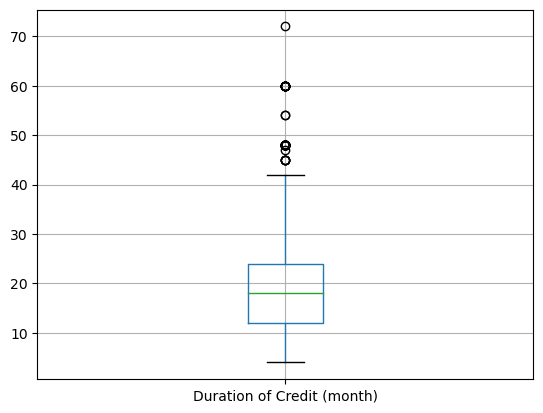

In [8]:
# Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers. 
# df.boxplot(column=['Credit Amount'])
df.boxplot(column=['Duration of Credit (month)'])
dup = pd.DataFrame(df)
dup.sort_values(by='Duration of Credit (month)')['Duration of Credit (month)']

In [9]:
df.boxplot(column=['Credit Amount'])

<AxesSubplot:>

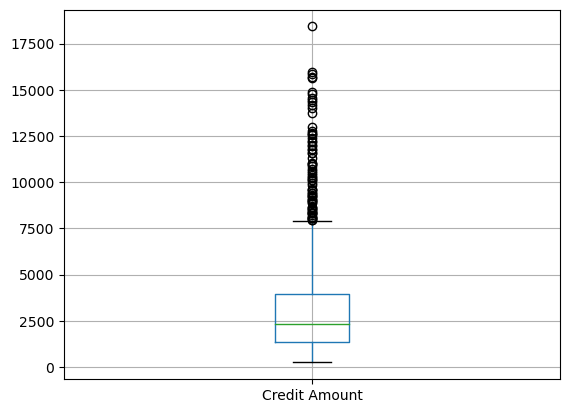

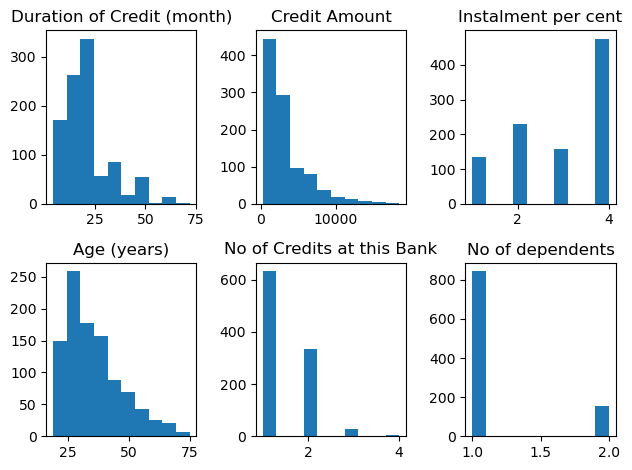

In [10]:
# Analyze the distribution of numeric attributes

import numpy as np
import matplotlib.pyplot as plt
 
fig, ((ax0, ax1,ax2), (ax3,ax4,ax5)) = plt.subplots(nrows=2, ncols=3)
 
ax0.hist(df['Duration of Credit (month)'])
ax0.set_title('Duration of Credit (month)')
 
ax1.hist(df['Credit Amount'])
ax1.set_title('Credit Amount')

ax2.hist(df['Instalment per cent'])
ax2.set_title('Instalment per cent')
 
ax3.hist(df['Age (years)'])
ax3.set_title('Age (years)')
 
ax4.hist(df['No of Credits at this Bank'])
ax4.set_title('No of Credits at this Bank')
 
ax5.hist(df['No of dependents'])
ax5.set_title('No of dependents')
 
fig.tight_layout()
plt.show()

In [11]:
# analyze whether numeric attributes have any influence on the class attribute.

from scipy import stats

x = df['Creditability'].astype('int64')
y = df.select_dtypes(include=['float64'])
result=[]
for i in y:
    print(i)
    result.append(stats.pointbiserialr(x,df[i]))
print(result)

Duration of Credit (month)
Credit Amount
Instalment per cent
Age (years)
No of Credits at this Bank
No of dependents
[PointbiserialrResult(correlation=-0.21492666544189082, pvalue=6.488049877184295e-12), PointbiserialrResult(correlation=-0.15474014555281285, pvalue=8.795399017201395e-07), PointbiserialrResult(correlation=-0.0724039372513304, pvalue=0.02203548630694876), PointbiserialrResult(correlation=0.091271948783022, pvalue=0.003868455281306381), PointbiserialrResult(correlation=0.04573248933920637, pvalue=0.14841978608044315), PointbiserialrResult(correlation=0.0030148530833447144, pvalue=0.9241408780993469)]


In [ ]:
df=df.drop(["Telephone"],axis=1)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Creditability                      1000 non-null   object 
 1   Account Balance                    1000 non-null   object 
 2   Duration of Credit (month)         1000 non-null   float64
 3   Payment Status of Previous Credit  1000 non-null   object 
 4   Purpose                            1000 non-null   object 
 5   Credit Amount                      1000 non-null   float64
 6   Value Savings/Stocks               1000 non-null   object 
 7   Length of current employment       1000 non-null   object 
 8   Instalment per cent                1000 non-null   float64
 9   Sex & Marital Status               1000 non-null   object 
 10  Guarantors                         1000 non-null   object 
 11  Duration in Current address        1000 non-null   object

In [12]:
# convert all attributes to categorical data type, to perform better during modelling.


In [46]:
# spearman rank correlation analysis

df.corr(method='spearman',numeric_only=False)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Foreign Worker
Creditability,1.000000,0.347944,-0.205685,0.221606,0.020900,-0.087083,0.175198,0.119806,-0.073690,0.090510,0.003197,-0.002553,-0.140851,0.113238,0.113046,0.022808,0.047316,-0.035330,0.003015,0.082079
Account Balance,0.347944,1.000000,-0.062703,0.190632,0.067842,-0.016577,0.242742,0.099142,-0.011597,0.043597,-0.120907,-0.048577,-0.027092,0.087430,0.059697,0.027853,0.087348,0.037453,-0.019721,-0.039882
Duration of Credit (month),-0.205685,-0.062703,1.000000,-0.041502,0.092754,0.624722,0.051335,0.057358,0.118046,0.018118,-0.012838,0.043671,0.306794,-0.038613,-0.092748,0.122629,0.028430,0.227266,-0.043265,-0.164644
Payment Status of Previous Credit,0.221606,0.190632,-0.041502,1.000000,-0.057043,-0.011067,0.014782,0.147885,0.037277,0.055931,-0.046787,0.059558,-0.047723,0.166929,0.162605,0.065677,0.506025,0.016000,0.013762,0.029133
Purpose,0.020900,0.067842,0.092754,-0.057043,1.000000,-0.031472,-0.013771,0.022882,0.091729,0.014275,0.009616,-0.056687,-0.014753,-0.033620,-0.061642,0.007915,0.020771,-0.010123,-0.070144,-0.138330
Credit Amount,-0.087083,-0.016577,0.624722,-0.011067,-0.031472,1.000000,0.050636,0.000758,-0.313113,0.001191,0.000756,0.023634,0.310325,0.024532,-0.055727,0.090726,0.023757,0.298365,0.041815,-0.044631
Value Savings/Stocks,0.175198,0.242742,0.051335,0.014782,-0.013771,0.050636,1.000000,0.123191,0.021860,0.021395,-0.107100,0.093089,0.033086,0.085162,0.000838,-0.004318,-0.030356,0.010878,0.024776,0.007148
Length of current employment,0.119806,0.099142,0.057358,0.147885,0.022882,0.000758,0.123191,1.000000,0.120560,0.139911,-0.017199,0.256016,0.098707,0.316789,0.004899,0.125711,0.135160,0.078667,0.097371,-0.027654
Instalment per cent,-0.073690,-0.011597,0.118046,0.037277,0.091729,-0.313113,0.021860,0.120560,1.000000,0.109708,-0.014301,0.047507,0.048958,0.071529,0.002250,0.089851,0.020997,0.085165,-0.072543,-0.095678
Sex & Marital Status,0.090510,0.043597,0.018118,0.055931,0.014275,0.001191,0.021395,0.139911,0.109708,1.000000,0.043116,-0.033859,0.002208,0.069868,-0.032073,0.130775,0.071383,-0.001960,0.144868,0.077820


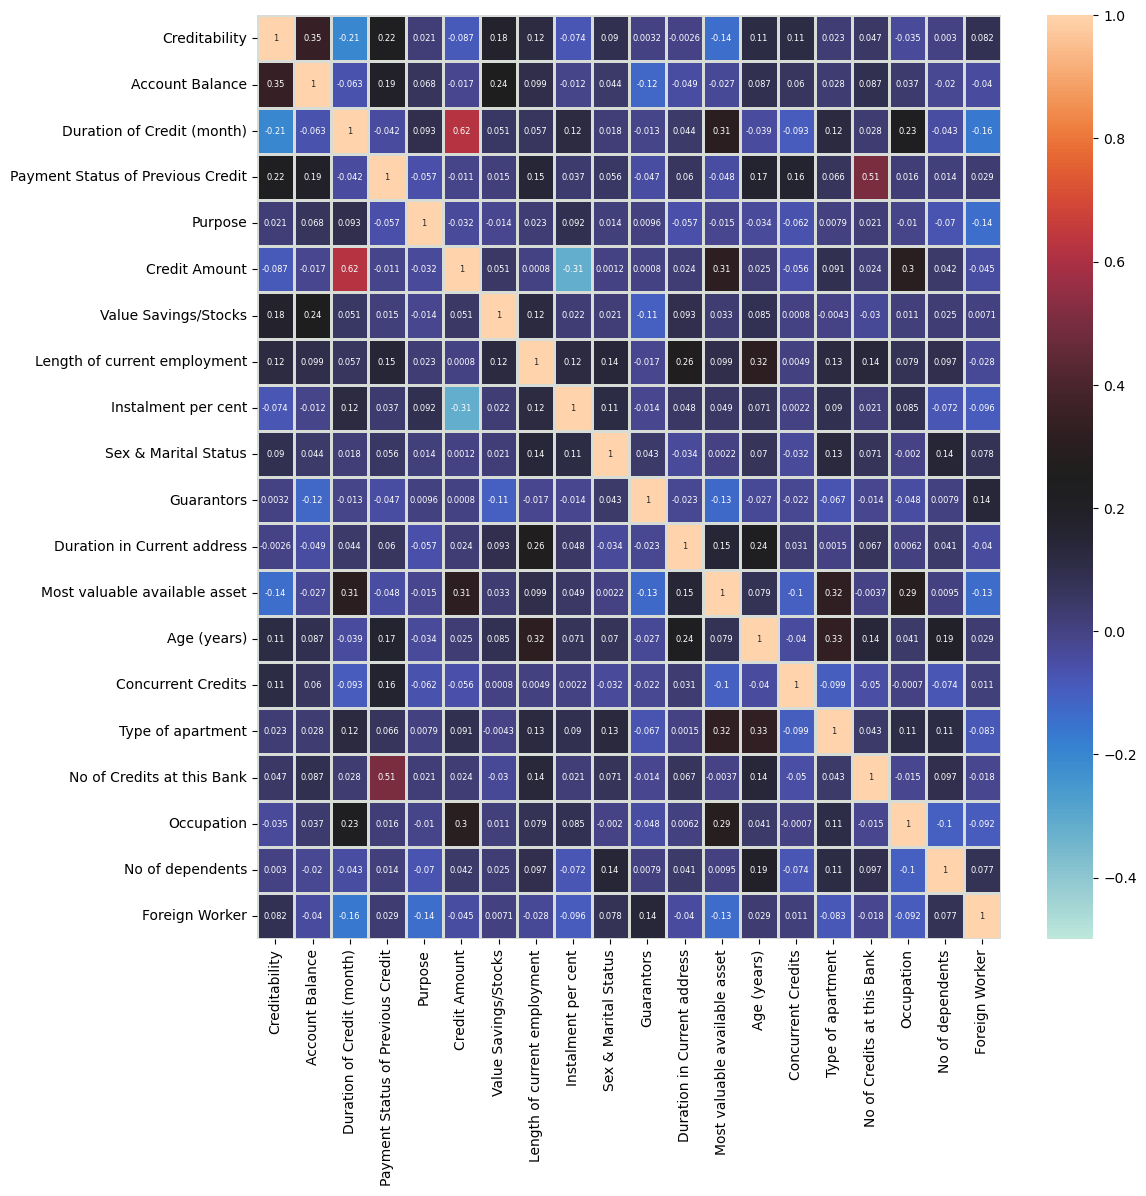

In [47]:
import seaborn as sea
import matplotlib.pylab as plt
result = df.corr(method='spearman',numeric_only=False).round(4)
plt.figure(figsize=(12, 12))
ax = sea.heatmap(result,annot=True,annot_kws={"size": 6},linecolor='#d8dcd6',linewidth = 2,vmax=1,vmin=-0.5,cmap='icefire')

plt.show()
# result

In [48]:
# dataset has an imbalanced class distribution, generally, it's mild imbalance, so, balancing dataset is optional.
# in this study case, we choose to balance dataset to perform better during modelling

df["Creditability"].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [15]:
! pip install -U imbalanced-learn
! pip install imblearn

     -------------------------------------- 226.0/226.0 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.9.1
    Uninstalling imbalanced-learn-0.9.1:
      Successfully uninstalled imbalanced-learn-0.9.1


In [52]:
x = df.drop(['Creditability'], axis=1)
y = df['Creditability']
y.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [56]:
# Random Oversampling

from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
random_os = RandomOverSampler(sampling_strategy="not majority") # String
x_res, y_res = random_os.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [57]:
y_res.value_counts()

1    700
0    700
Name: Creditability, dtype: int64

In [60]:
# First split the data into train and test set
! pip install sklearn

from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features

feature_names=df.columns[df.columns != "Creditability"]

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df["Creditability"], test_size=0.3,random_state=1) 

In [61]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [ ]:
help(tree.DecisionTreeClassifier)

class Names ['1' '0']


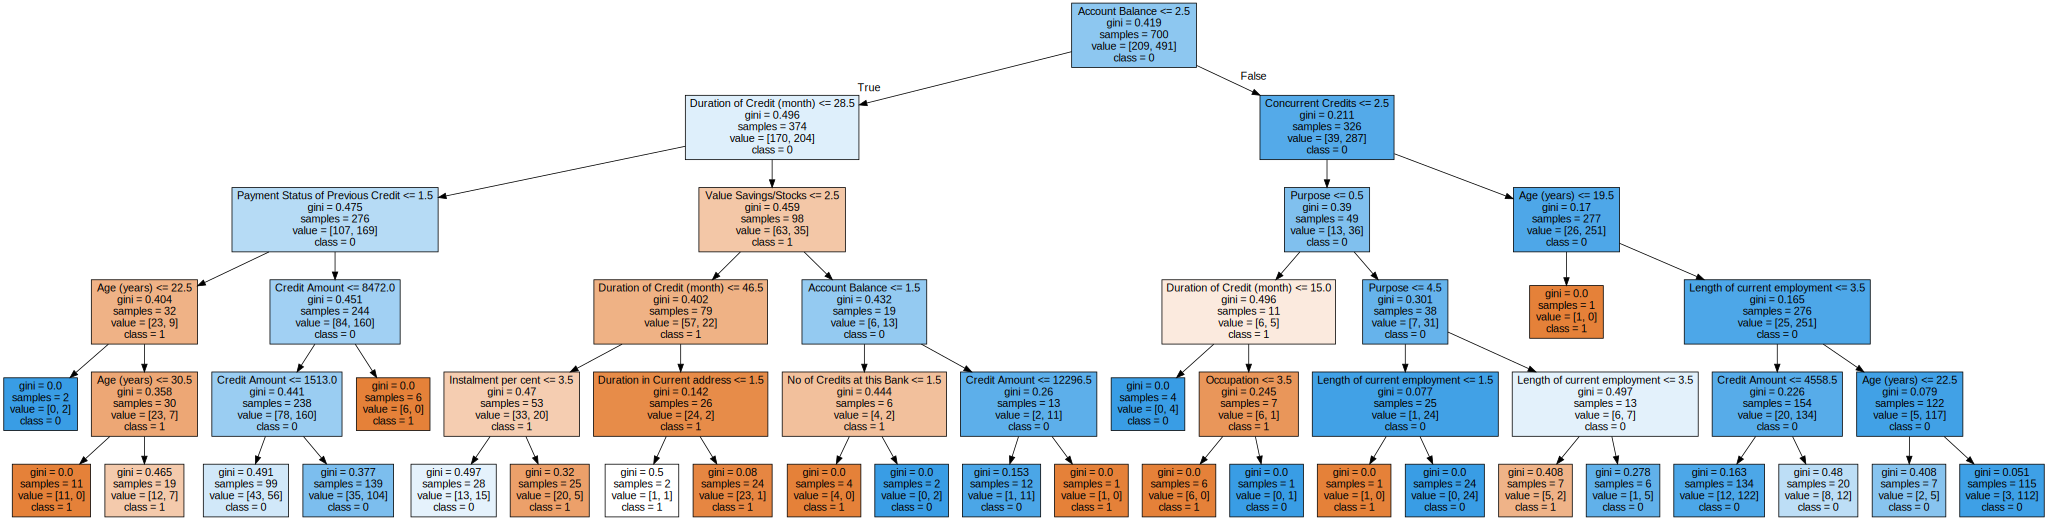

In [64]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph

In [65]:
y_pred = clf.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  8 201]]
TP:  201 , FP:  62 , TN:  29 , FN: 8


In [67]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



In [69]:
# train, test 80%, 20%
class_col_name='Creditability' 

new_features=df.columns[df.columns != class_col_name]


X_train, X_test, y_train, y_test = train_test_split(df.loc[:, new_features], df[class_col_name], test_size=0.2,random_state=1) 
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [70]:
y_pred = clf.predict(X_test)
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 17  39]
 [ 20 124]]
TP:  124 , FP:  39 , TN:  17 , FN: 20


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.30      0.37        56
           1       0.76      0.86      0.81       144

    accuracy                           0.70       200
   macro avg       0.61      0.58      0.59       200
weighted avg       0.68      0.70      0.68       200



In [75]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [74]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 20


In [82]:
from sklearn.metrics import classification_report
from sklearn import metrics

print("Number of features used ",nb.feature_count_.shape[1])
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print(classification_report(y_test, y_pred))

Number of features used  19
Classes  ['0' '1']
Number of records for classes  [244. 556.]
              precision    recall  f1-score   support

           0       0.35      0.36      0.35        56
           1       0.75      0.74      0.75       144

    accuracy                           0.64       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.64      0.64      0.64       200

